# 27. Correlation and Regression

In [78]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

I keep some data frames in CSV format accessible from my website. One of them is called personality.csv and has, as you might imagine, personality variables. In this case, we are using the `neuroanx` subset which compares [neuroticism](https://www.webmd.com/mental-health/neurotic-behavior-overview), anxiety and several related variables:

G21
: Y/N response to "are you 21 years old or older?"

SitClass
: Front/middle/back response to "where do you prefer to sit in class?"

Friends
: Same/opposite/no difference response to "which sex do you find it easiest to make friends with."

TxRel
: Toxic relationships beliefs, higher scores indicate more toxicity.

Opt
: Optimism, higher scores indicate more optimism

SE
: Self-esteem, higher score indicate higher levels of self-esteem

## Standard descriptives for numeric variables

For each statistic below, we need an array of numeric data as the input. Let's grab some data from the `personality.csv` file.

In [119]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/neuroanx.csv')
pers.show(5)

Sex,G21,SitClass,Friends,TxRel,Anx,Opt,SE,Neuro
M,N,F,O,26,23,20,70,10
F,N,M,S,21,24,22,68,11
M,Y,F,E,25,27,29,65,11
M,Y,B,E,22,30,28,61,15
M,N,M,E,23,40,26,64,16


In [120]:
neuroanx = pers.select('Neuro','Anx')
neuro = neuroanx.column(0)

### Mean ( $\overline x$ )

Given an array, we simply use `np.average` or `np.mean`.

In [121]:
mean = np.mean(neuro)
mean

42.66197183098591

## Sample size ( $n$ )

In [122]:
n = len(neuro)
n

142

### Standard deviation

A deviation is the distance between a data point and the mean. The *sample* standard deviation is the sum of the squared deviations divided by one less than the sample size ($n-1$).

In [123]:
devs_squared = ( neuro - mean ) ** 2

In [124]:
s = np.sqrt(sum(devs_squared / (n-1)))
s

13.946141246193354

We can test whether or not our formula is correct using the `numpy` function `std` with the `ddof=1` option on. You will notice some rounding error.

In [125]:
np.std(neuro, ddof=1)

13.946141246193347

### Print descriptives

The following three statistics are considered the *standard descriptives* by quantiative researchers. In a scientific report, each data set should be accompanied by these three descriptive statistics: 

* mean
* sample size
* standard deviation

To help detect skew and outliers, the median can be useful. Most researchers would not consider it a standard descriptive.

In [126]:
def describe (array):
    mean = np.mean(array)
    median = np.median(array)
    n = len(array)
    s = np.std(array, ddof=1)
    print('The mean is', round(mean,2))
    print('The median is', median)
    print('The sample size is', n)
    print('The standard deviation is', round(s,2))
    Table().with_column('Data',array).hist(0)

The mean is 42.66
The median is 43.0
The sample size is 142
The standard deviation is 13.95


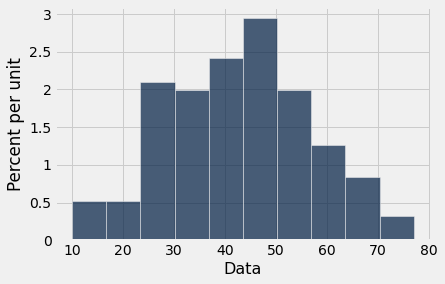

In [127]:
describe(neuro)

## Standardized scores

The formula for the standardized score is:

$$z = \frac{x-\mu}{\sigma}$$

where $x$ is the score from the data set and $\mu$ and $\sigma$ are the population mean and standard deviation respectively.

### Creating a `z_scores` function

In [128]:
def z_scores(array):
    mean = np.mean(array)
    sd = np.std(array)
    return (array - mean) / sd

In [129]:
z_scores(neuro)

array([-2.35029814, -2.27833989, -2.27833989, -1.99050692, -1.91854867,
       -1.84659043, -1.77463219, -1.70267394, -1.48679921, -1.41484097,
       -1.34288272, -1.34288272, -1.34288272, -1.27092448, -1.27092448,
       -1.19896623, -1.19896623, -1.12700799, -1.05504975, -1.05504975,
       -1.05504975, -0.9830915 , -0.9830915 , -0.9830915 , -0.9830915 ,
       -0.9830915 , -0.9830915 , -0.91113326, -0.91113326, -0.91113326,
       -0.83917501, -0.83917501, -0.76721677, -0.76721677, -0.69525853,
       -0.69525853, -0.62330028, -0.62330028, -0.62330028, -0.62330028,
       -0.62330028, -0.62330028, -0.62330028, -0.62330028, -0.55134204,
       -0.55134204, -0.55134204, -0.47938379, -0.47938379, -0.40742555,
       -0.40742555, -0.40742555, -0.33546731, -0.33546731, -0.33546731,
       -0.26350906, -0.26350906, -0.19155082, -0.19155082, -0.19155082,
       -0.19155082, -0.19155082, -0.11959257, -0.11959257, -0.11959257,
       -0.11959257, -0.11959257, -0.11959257, -0.04763433,  0.02

## Correlation

Let's check to see if the two numeric variables of `neuro` (neuroticism) and `anx` (anxiety) are associated.

In [130]:
data = pers.select('Neuro','Anx')
data.show(5)

Neuro,Anx
10,23
11,24
11,27
15,30
16,40


The correlation can be calculated in terms of $z$-scores (standardized scores).

$$r = \frac{1}{n-1} \sum z_{x_i} z_{y_i}$$

meaning we multiply all $xy$-pairs of standardized scores, sum them and divide by $n-1$.

The line of best fit always passes through the point

$$\left(\overline{x},\overline{y}\right)$$

and has slope

$$m = r \left(\frac{s_y}{s_x}\right)$$

where $s_x$ and $s_y$ are the sample standard deviations for the $x$ and $y$ variables respectively. In statistics, we write the line of best fit as

$$y = a + bx$$

where $a$ is the $y$-intercept and $b$ is the slope.

### Creating the `reg_r` and `reg_stat` function to calculate regression statistics and produce a scatter plot

In [136]:
def reg_r (tab):
    x = tab.column(0)
    y = tab.column(1)
    return sum(z_scores(x)*z_scores(y))/(n-1)

In [137]:
def reg_stat (tab):
    x = tab.column(0)
    y = tab.column(1)
    r = reg_r(tab)
    b = r * np.std(y) / np.std(x)
    a = np.mean(y) - b * np.mean(x)
    print('The correlation is ', r)
    print('The line of best fit is y =',round(a,4), '+',round(b,4),'x')
    tab.scatter(0,1, fit_line = True)

The correlation is  0.7140323446533897
The line of best fit is y = 16.8451 + 0.4833 x


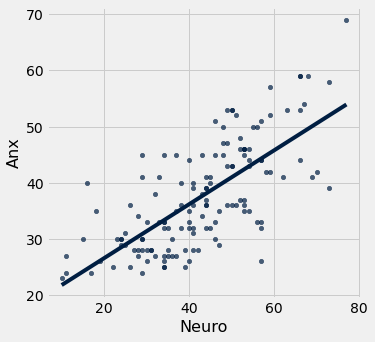

In [138]:
reg_stat(data)

### Creating the `reg_shuffle` function

While not a descriptive statistic, we do need a test for significant correlation. The idea is similar to A/B testing. We can randomly shuffle the $y$-variable and determine a distribution that assumes a zero correlation. We can compare our observed correlation to that value.

Let's begin with the `ab_shuffle` function and tweak it slightly.

```
def ab_shuffle(tab):
    shuffle_group = tab.sample(with_replacement = False).column(0)
    shuffled_tab = tab.with_column("Shuffled Grouping",shuffle_group).select(2,1)
    return shuffled_tab
```

We want to feed our function a two-column table with the $x$-variable listed in the first column, and shuffle the second column. (The `ab_shuffle` function shuffles the first column.) We also need to return the original $x$ column with the shuffled $y$, e.g. the first and third columns.

In [139]:
def reg_shuffle(tab):
    shuffled_y = tab.sample(with_replacement = False).column(1)
    shuffled_tab = tab.with_column("Shuffled Y",shuffled_y).select(0,2)
    return shuffled_tab

In [140]:
reg_shuffle(neuroanx)

Neuro,Shuffled Y
10,51
11,40
11,32
15,24
16,42
17,33
18,31
19,41
22,36
23,44


This will allow us to build a `for` loop and create the distribution of the test statistic that models a zero correlation.